<a href="https://colab.research.google.com/github/keropfia/Primary-models/blob/main/Baranyi%20and%20Roberts%20model%20(no%20error%20bar).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
from tqdm.notebook import tqdm as tqdm

In [2]:
datafile_name = '20230628 S. aquimarina in chikuwa at 10 C.csv'
data = pd.read_csv(datafile_name)
data

,Time (h),log count
0,0,5.342423
1,24,6.462398
2,48,7.949390
3,72,8.949390
4,96,8.342423
5,120,9.579784
6,144,9.591065


In [6]:
x_data = data['Time (h)']
y_data = data['log count']

In [7]:
def func(x, logN0_baranyi, logN_max_baranyi, mu_baranyi, lambda_baranyi):
    f = logN_max_baranyi + np.log10((-1+np.exp(mu_baranyi*lambda_baranyi)+np.exp(mu_baranyi*x))/(-1+np.exp(mu_baranyi*x)+np.exp(mu_baranyi*lambda_baranyi)*10**(logN_max_baranyi-logN0_baranyi)))
    return f

In [8]:
para_pred, cov = curve_fit(func,x_data,y_data, p0=[3.5, 8, 0, 2.5])
print("logN0 (log10CFU/mL), logNmax (log10CFU/mL), mu (log10CFU/hour), lambda (hour)")
print(para_pred)

logN0 (log10CFU/mL), logNmax (log10CFU/mL), mu (log10CFU/hour), lambda (hour)
[5.33936366 9.18612728 0.13466969 4.17750296]


In [10]:
time_min = 0
time_max = np.max(data['Time (h)'])
devide = 100
time_interval = np.arange(time_min, time_max*(devide+1)/devide,
                          (time_max-time_min)/devide, dtype="float")

In [11]:
y_pred = func(time_interval, para_pred[0], para_pred[1], para_pred[2], para_pred[3])

In [13]:
time_list = list(set(x_data))
Means = np.empty([len(time_list)])
y_sd = np.empty([len(time_list)])
for i in range(len(time_list)):
    Means[i] = np.mean(data[(data['Time (h)'] == time_list[i])]['log count'].astype('float'))
    y_sd[i] = np.std(data[(data['Time (h)'] == time_list[i])]['log count'].astype('float'))

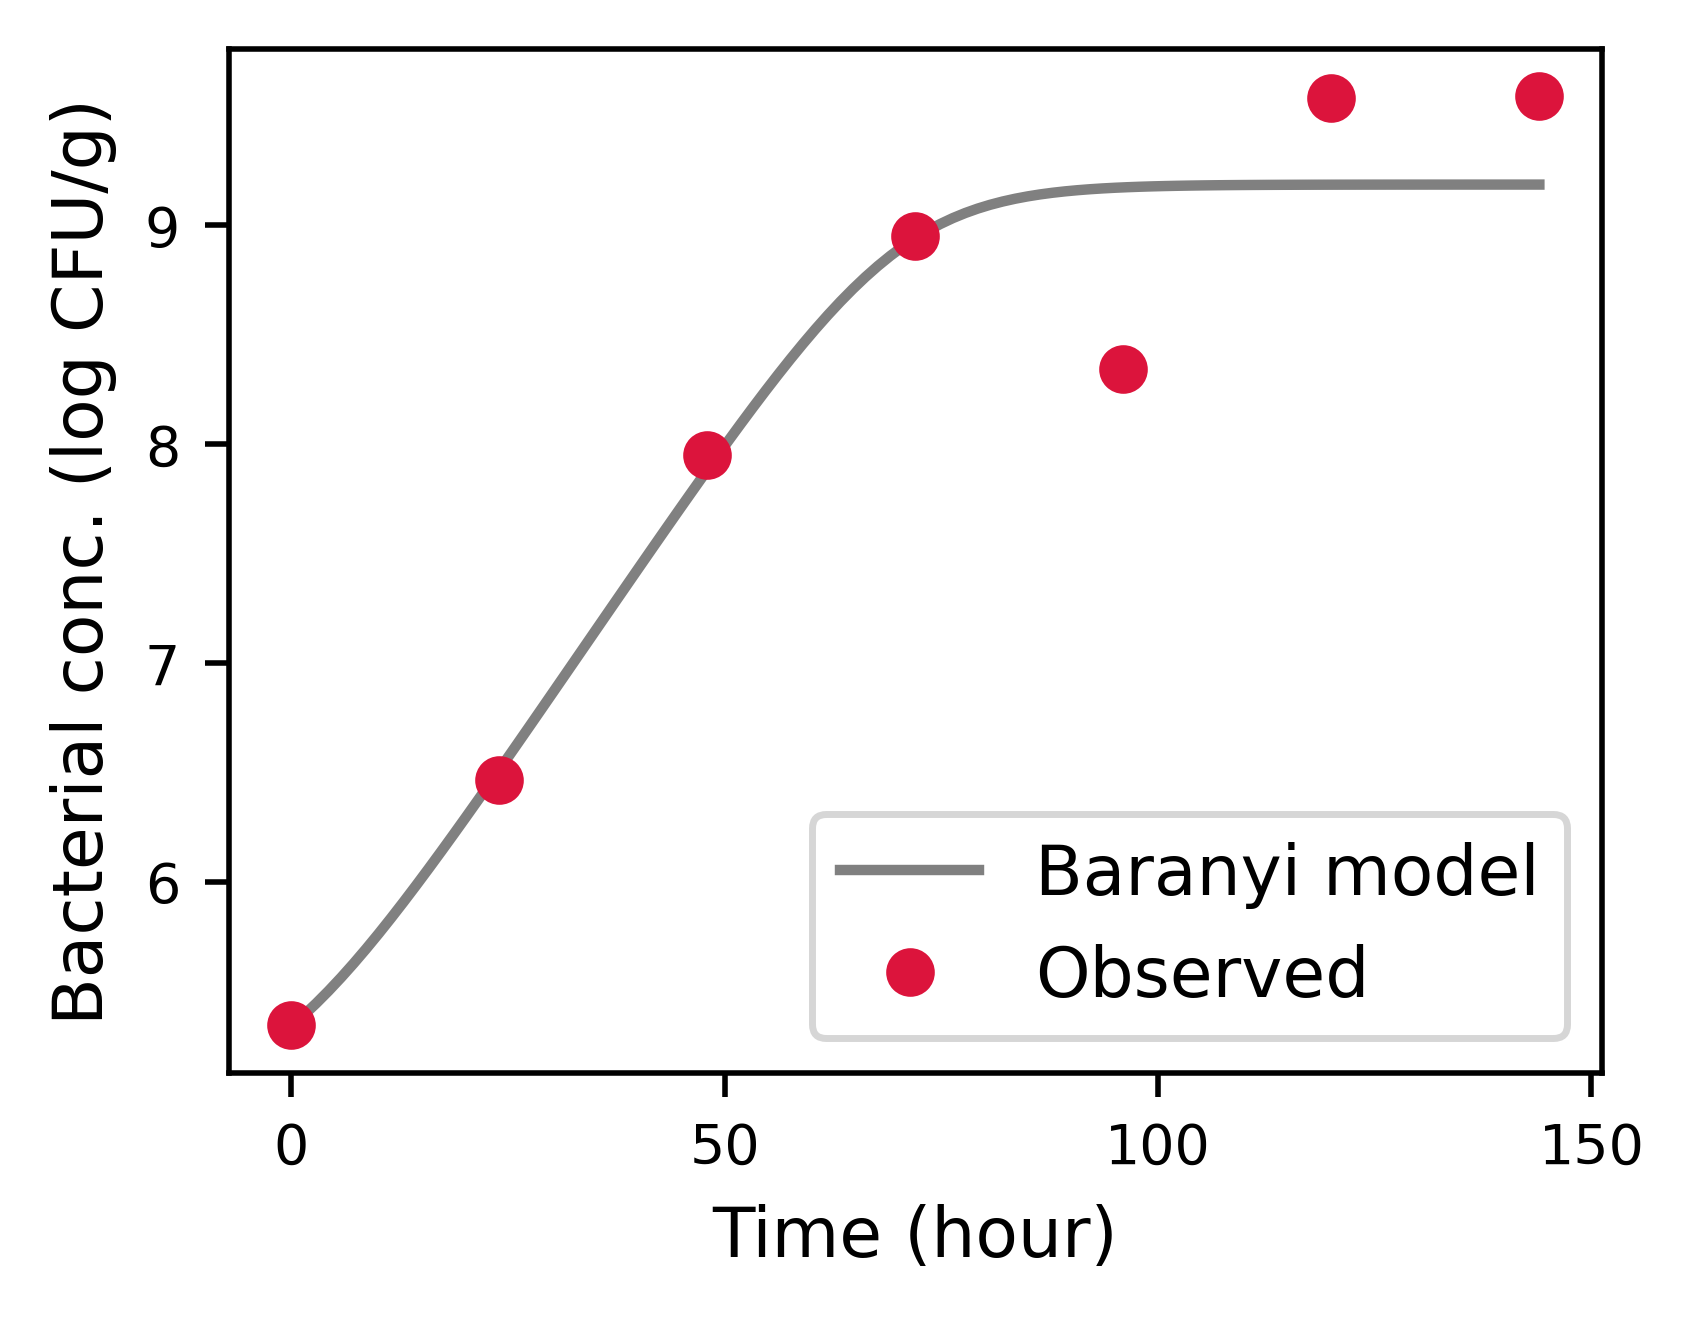

In [17]:
plt.figure(figsize=(9*0.393701,9*0.393701*3/4), dpi=500)

plt.xticks(size=8)
plt.yticks(size=8)
plt.xlabel("Time (hour)",size=10)
plt.ylabel("Bacterial conc. (log CFU/g)",size=10)

plt.plot(time_interval, y_pred, color='gray', label='Baranyi model' )

plt.plot(time_list, Means, lw=0, marker='o', color='crimson', label='Observed')

plt.legend()

plt.savefig(datafile_name.replace('.csv', '.pdf'), bbox_inches="tight", dpi=500)

plt.show()